In [ ]:
# Install libraries if needed
# !pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier for classification
from sklearn.metrics import mean_squared_error, r2_score  # or classification metrics


In [ ]:
# Mount Google Drive if using your own dataset there
# from google.colab import drive
# drive.mount('/content/drive')

# Load the dataset (assuming you've uploaded it to Colab)
df = pd.read_csv('india_weather_data.csv')
df.head()


,date,latitude,longitude,wind_speed,cloud_cover,precipitation_probability,pressure_surface_level,dew_point,uv_index,heatwave,visibility,rainfall,solar_radiation,snowfall,max_temperature,min_temperature,max_humidity,min_humidity
0,2023-01-01 00:00:00,28.6139,77.2090,0.428064,56.787047,89.803147,1003.885666,29.282458,6.353398,0.0,0.827196,34.565602,NaN,0.0,104.379272,96.475944,25.221215,17.901661
1,2023-01-01 00:00:00,19.0760,72.8777,13.603933,36.321945,75.198203,500.000000,NaN,6.653509,0.0,8.040858,NaN,944.176384,0.0,38.198134,32.485543,86.025179,74.403003
2,2023-01-01 00:00:00,12.9716,77.5946,100.000000,49.585297,60.621663,1001.774831,31.567394,5.976996,0.0,6.776773,0.212155,451.964858,0.0,37.908737,NaN,65.569945,52.094434
3,2023-01-01 00:00:00,22.5726,88.3639,2.785259,21.462155,38.284893,993.455514,29.974869,7.757285,0.0,5.783869,0.389140,743.226528,0.0,33.755248,32.350385,69.260757,61.289844
4,2023-01-01 00:00:00,NaN,80.2707,9.399230,NaN,21.538080,1020.945313,25.815398,3.376130,0.0,8.133818,0.000000,493.243162,0.0,32.172688,27.963711,81.054374,75.400783


In [ ]:
# Basic info and null values
df.info()
df.describe()
df.isnull().sum()

# Fill or drop nulls as needed
df = df.dropna()  # or df.fillna(method='ffill') depending on your needs


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131055 entries, 0 to 131054
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       118202 non-null  object 
 1   latitude                   117910 non-null  float64
 2   longitude                  117768 non-null  float64
 3   wind_speed                 117886 non-null  float64
 4   cloud_cover                118072 non-null  float64
 5   precipitation_probability  117821 non-null  float64
 6   pressure_surface_level     117806 non-null  float64
 7   dew_point                  118175 non-null  float64
 8   uv_index                   117737 non-null  float64
 9   heatwave                   117855 non-null  float64
 10  visibility                 117974 non-null  float64
 11  rainfall                   118006 non-null  float64
 12  solar_radiation            118059 non-null  float64
 13  snowfall                   11

In [ ]:
# Encode any categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
X = df.drop('heatwave', axis=1)
y = df['heatwave']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = RandomForestRegressor(random_state=42)  # or RandomForestClassifier()
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)

# For regression
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# For classification, you'd use accuracy_score, confusion_matrix, etc.


R2 Score: 0.906674483331871
RMSE: 0.08696022728091156


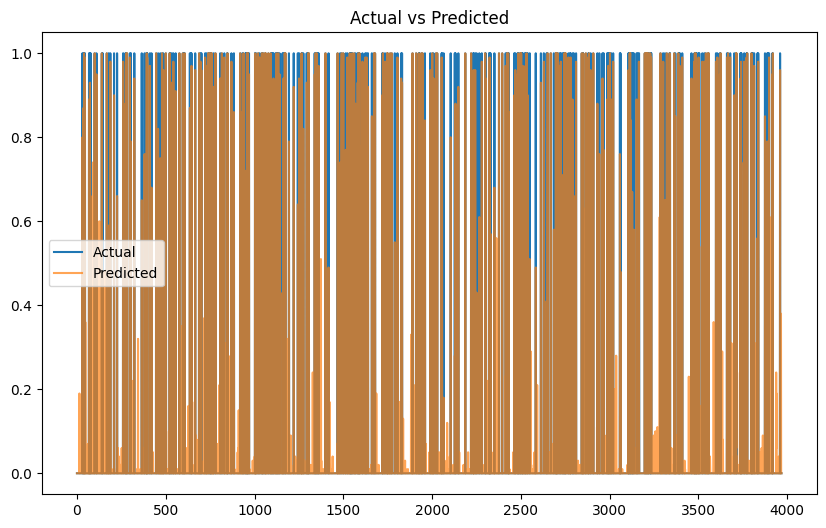

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted')
plt.show()


In [ ]:
import joblib
joblib.dump(model, 'weather_model.pkl')


['weather_model.pkl']